# Explore the Global Maritime Traffic Density Service (GMTDS) with Python

API documentation is available at https://maplarge-public.s3.us-east-1.amazonaws.com/UserGuides/GMTDS_Technical_Integration_Guide.pdf

In [11]:
import requests
import xml.etree.ElementTree as ET
from IPython.display import display, Image

## `GetCapabilities` API

In [2]:
url = "https://gmtds.maplarge.com/ogc/wms?service=wms&version=1.3.0&request=getcapabilities"

response = requests.get(url, timeout=10)
response.text

'<?xml version="1.0" encoding="utf-8"?>\n<WMS_Capabilities xmlns:fes="http://www.opengis.net/fes/2.0" xmlns:ows="http://www.opengis.net/ows/1.1" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xs="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" version="1.3.0" xsi:schemaLocation="http://www.opengis.net/wms http://k8s-default-maplarge-1f1fb545dd-858402477.us-east-1.elb.amazonaws.com:80/ogc/schemas/wms/1.3.0/capabilities_1_3_0.xsd" xmlns="http://www.opengis.net/wms">\n  <Service>\n    <Name>WMS</Name>\n    <Title>MapLarge OGC WMS</Title>\n    <Abstract>Default descriptions</Abstract>\n    <KeywordList>\n      <Keyword>WMS</Keyword>\n      <Keyword>OGC</Keyword>\n    </KeywordList>\n    <ContactInformation>\n      <ContactPersonPrimary>\n        <ContactPerson />\n        <ContactOrganization />\n      </ContactPersonPrimary>\n      <ContactPosition />\n      <ContactAddress>\n        <AddressType>Work</AddressType>\n        <Address />\n        <C

In [3]:
element = ET.XML(response.text)
ET.indent(element)
print(ET.tostring(element, encoding="unicode"))

<ns0:WMS_Capabilities xmlns:ns0="http://www.opengis.net/wms" xmlns:ns2="http://www.w3.org/1999/xlink" xmlns:ns3="http://www.opengis.net/fes/2.0" xmlns:ns4="http://www.opengis.net/ows/1.1" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" version="1.3.0" xsi:schemaLocation="http://www.opengis.net/wms http://k8s-default-maplarge-1f1fb545dd-858402477.us-east-1.elb.amazonaws.com:80/ogc/schemas/wms/1.3.0/capabilities_1_3_0.xsd">
  <ns0:Service>
    <ns0:Name>WMS</ns0:Name>
    <ns0:Title>MapLarge OGC WMS</ns0:Title>
    <ns0:Abstract>Default descriptions</ns0:Abstract>
    <ns0:KeywordList>
      <ns0:Keyword>WMS</ns0:Keyword>
      <ns0:Keyword>OGC</ns0:Keyword>
    </ns0:KeywordList>
    <ns0:ContactInformation>
      <ns0:ContactPersonPrimary>
        <ns0:ContactPerson />
        <ns0:ContactOrganization />
      </ns0:ContactPersonPrimary>
      <ns0:ContactPosition />
      <ns0:ContactAddress>
        <ns0:AddressType>Work</ns0:AddressType>
        <ns0:Address />
        <ns0:Ci

## `GetMap` API

In [24]:
import urllib.parse


def build_url(
    base: str = "https://gmtds.maplarge.com/ogc/ais:density/wms",
    **kwargs: str,
) -> str:
    return base + "?" + urllib.parse.urlencode(kwargs)

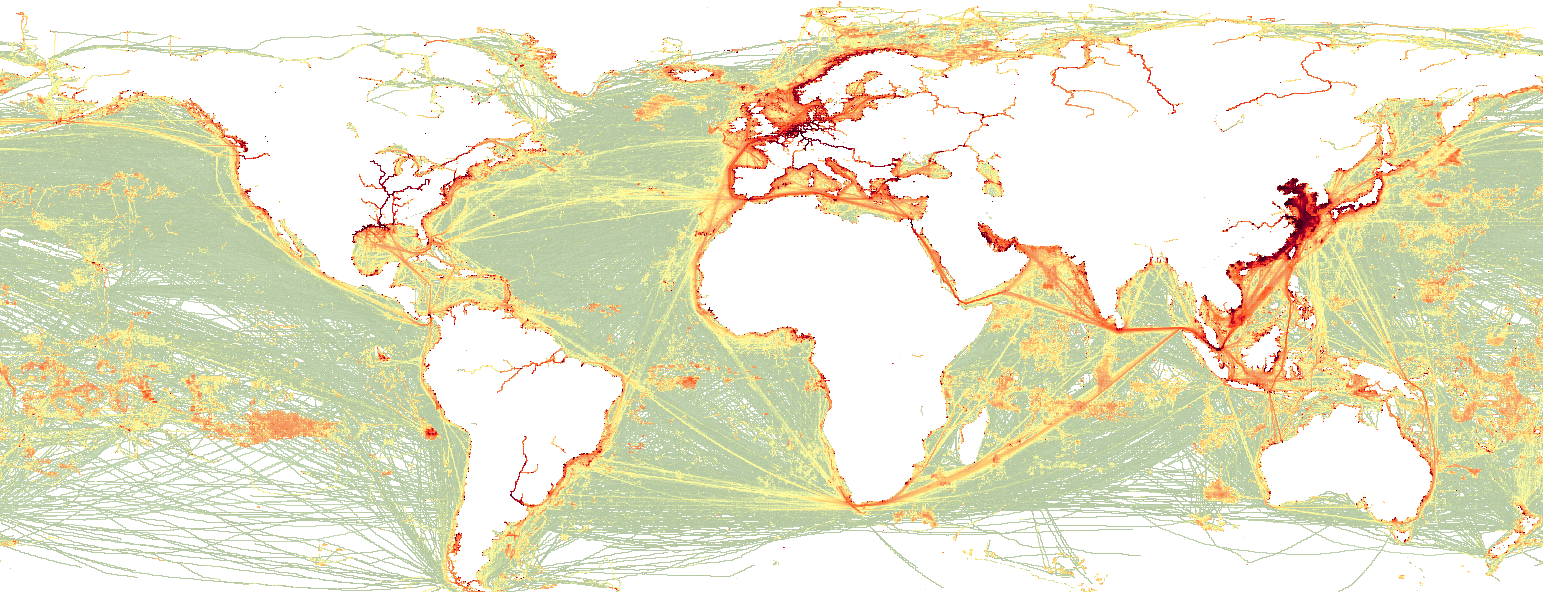

In [35]:
url = build_url(
    SERVICE="WMS",
    VERSION="1.3.0",
    REQUEST="GetMap",
    BBOX="-54.93330001831054688,-179.589996337890625,82.48329925537109375,179.38330078125",
    CRS="EPSG:4326",
    WIDTH="1543",
    HEIGHT="592",
    LAYERS="ais:density",
    # STYLES=",
    FORMAT="image/png",
    TRANSPARENT="TRUE",
    time="2023-10-01T00:00:00Z",
    CQL_FILTER="category_column='Loitering' AND category='NonLoitering'",
)

response = requests.get(url, timeout=10)

if response.status_code == 200:
    display(Image(response.content))
else:
    print(response.status_code)
    print(response.text)

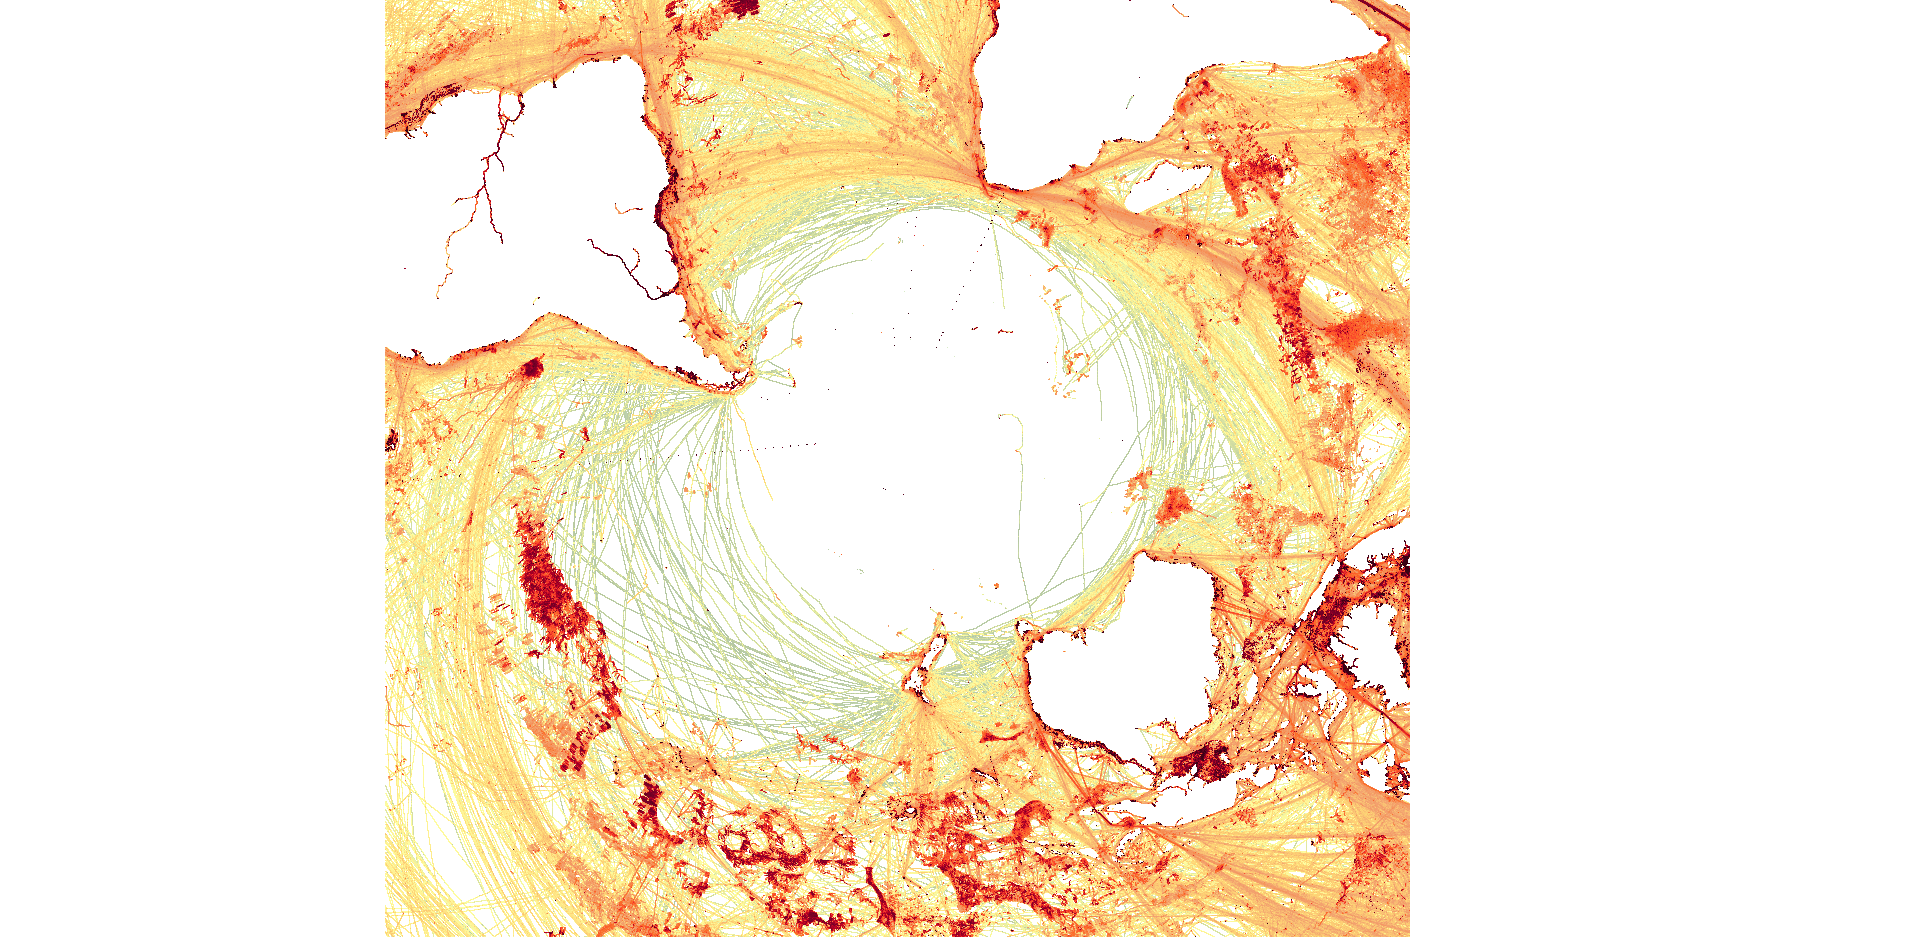

In [36]:
url = build_url(
    SERVICE="WMS",
    VERSION="1.3.0",
    REQUEST="GetMap",
    BBOX="-21667098.453043934,-12077535.369589705,24710637.36618054,10555765.913021404",
    CRS="EPSG:3031",
    WIDTH="1920",
    HEIGHT="937",
    LAYERS="ais:density",
    # STYLES=",
    FORMAT="image/png",
    TRANSPARENT="TRUE",
    time="2023-10-01T00:00:00Z",
    CQL_FILTER="category_column='All' AND category='All'",
)

response = requests.get(url, timeout=30)

if response.status_code == 200:
    display(Image(response.content))
else:
    print(response.status_code)
    print(response.text)